In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from scipy.ndimage import gaussian_filter1d

In [6]:
df = pd.read_csv("data_air/AB_data_clean.csv")
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,neighbourhood_other,neighbourhood_other_label,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,Other,29,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,Midtown,25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Heatmap

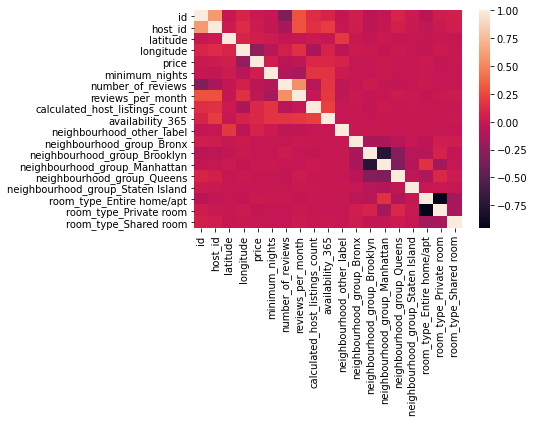

In [4]:
sns.heatmap(df.corr())
plt.show()

## Plots using price

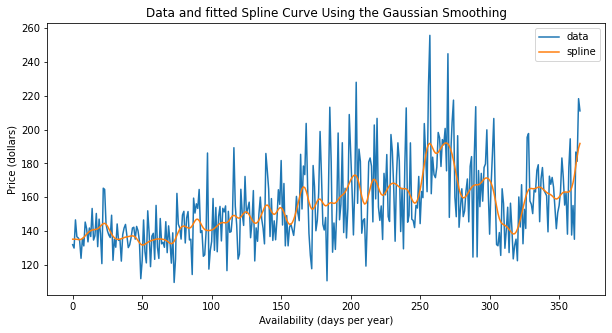

In [24]:
plot_data = df.groupby(['availability_365',]).mean().loc[:,'price']

x = plot_data.index
y = plot_data.values
y_smoothed = gaussian_filter1d(y, sigma=3)

plt.figure(figsize=(10,5))
plt.plot(plot_data, label = 'data')
plt.plot(x, y_smoothed, label = 'spline')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Availability (days per year)")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

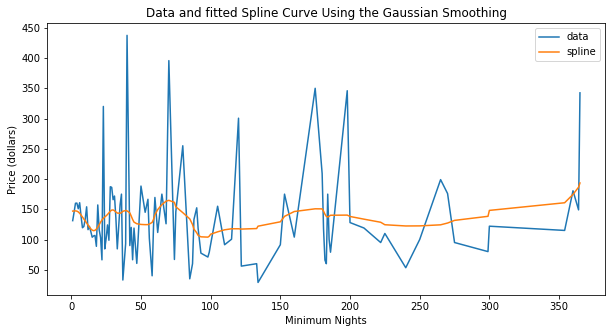

In [25]:
plot_data = df.groupby(['minimum_nights',]).mean().loc[:,'price']

x = plot_data.index
y = plot_data.values
y_smoothed = gaussian_filter1d(y, sigma=3)

plt.figure(figsize=(10,5))
plt.plot(plot_data, label = 'data')
plt.plot(x, y_smoothed, label = 'spline')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Minimum Nights")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

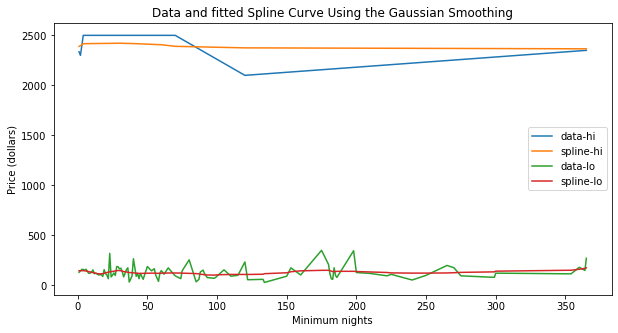

In [26]:
thres = 2000
df_hi = df[df.price > thres]
df_lo = df[df.price <= thres]


plot_data_hi = df_hi.groupby(['minimum_nights',]).mean().loc[:,'price']
plot_data_lo = df_lo.groupby(['minimum_nights',]).mean().loc[:,'price']

x_hi = plot_data_hi.index
y_hi = plot_data_hi.values
y_smoothed_hi = gaussian_filter1d(y_hi, sigma=3)

x_lo = plot_data_lo.index
y_lo = plot_data_lo.values
y_smoothed_lo = gaussian_filter1d(y_lo, sigma=3)

plt.figure(figsize=(10,5))
plt.plot(plot_data_hi, label = 'data-hi')
plt.plot(x_hi, y_smoothed_hi, label = 'spline-hi')
plt.plot(plot_data_lo, label = 'data-lo')
plt.plot(x_lo, y_smoothed_lo, label = 'spline-lo')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Minimum nights")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

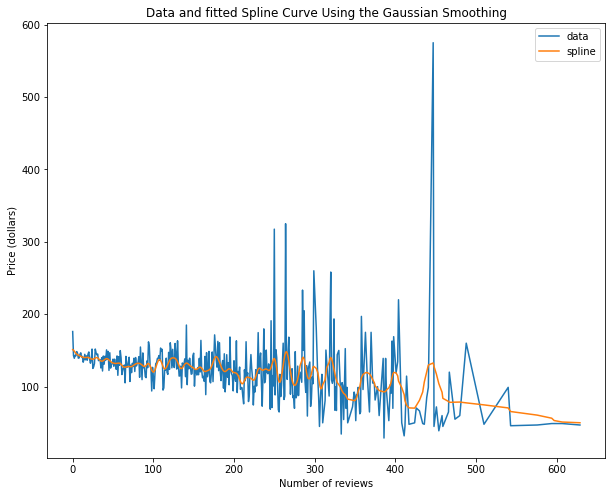

In [27]:
plot_data = df.groupby(['number_of_reviews',]).mean().loc[:,'price']

x = plot_data.index
y = plot_data.values
y_smoothed = gaussian_filter1d(y, sigma=3)

plt.figure(figsize=(10,8))
plt.plot(plot_data, label = 'data')
plt.plot(x, y_smoothed, label = 'spline')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Number of reviews")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

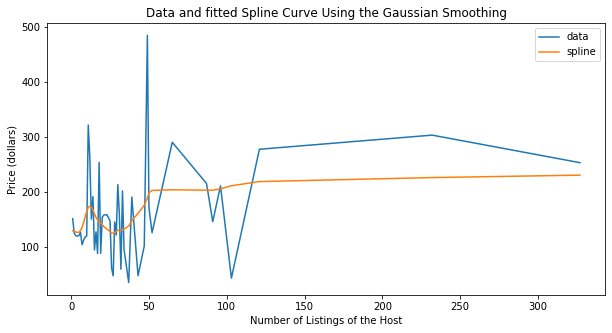

In [28]:
plot_data = df.groupby(['calculated_host_listings_count',]).mean().loc[:,'price']

x = plot_data.index
y = plot_data.values
y_smoothed = gaussian_filter1d(y, sigma=3)

plt.figure(figsize=(10,5))
plt.plot(plot_data, label = 'data')
plt.plot(x, y_smoothed, label = 'spline')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Number of Listings of the Host")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

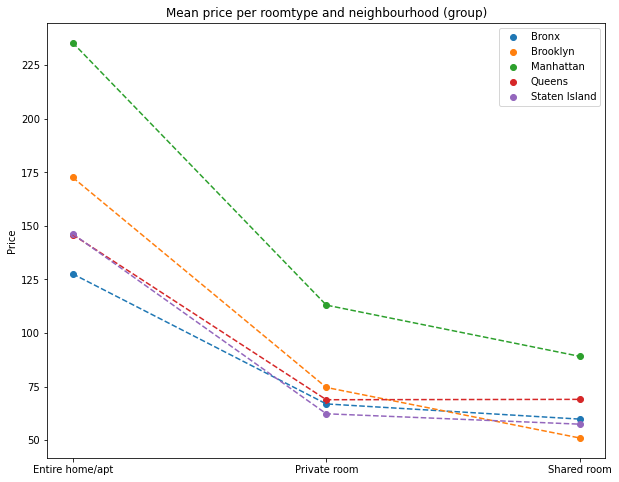

In [29]:
plot_data = df.groupby(['neighbourhood_group','room_type',]).mean().loc[:,'price']


plt.figure(figsize=(10,8))
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Bronx'], label = 'Bronx')
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Brooklyn'], label = 'Brooklyn')
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Manhattan'], label = 'Manhattan')
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Queens'], label = 'Queens')
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Staten Island'], label = 'Staten Island')
plt.plot(plot_data.loc['Bronx'], linestyle='dashed')
plt.plot(plot_data.loc['Brooklyn'], linestyle='dashed')
plt.plot(plot_data.loc['Manhattan'], linestyle='dashed')
plt.plot(plot_data.loc['Queens'], linestyle='dashed')
plt.plot(plot_data.loc['Staten Island'], linestyle='dashed')
plt.title("Mean price per roomtype and neighbourhood (group)")
plt.legend()
plt.ylabel("Price")
plt.show()

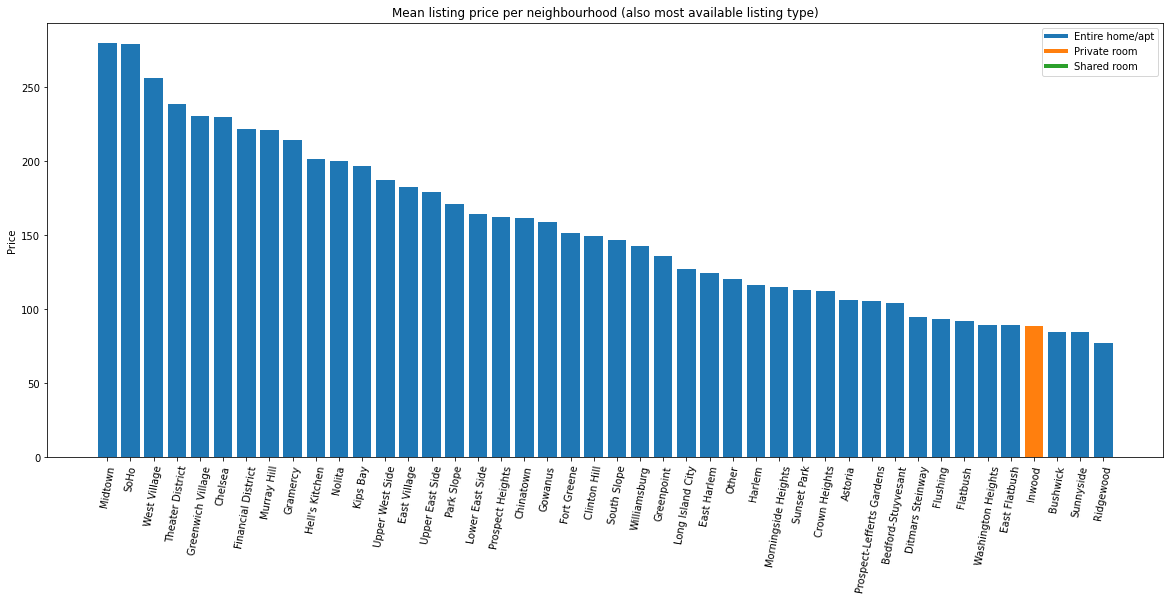

In [30]:
plot_data = df.groupby(['neighbourhood_other',]).mean().loc[:,'price'].sort_values(ascending = False)

plot_data_color = df.groupby(['neighbourhood_other',]).mean()[['room_type_Entire home/apt', 'room_type_Shared room', 'room_type_Private room']]
color = []
for x in plot_data_color.values:
  color.append(np.argmax(x))
plot_data_color['color'] = color

plot_data = pd.DataFrame(plot_data).merge(plot_data_color, left_index = True, right_index = True)

col = {0: '#1f77b4', 1: '#2ca02c', 2: '#ff7f0e'}

plt.figure(figsize=(20,8))
plt.bar(plot_data.index, height = plot_data.price, color = (plot_data.color.map(col)))
plt.title("Mean listing price per neighbourhood (also most available listing type)")
plt.ylabel("Price")
plt.xticks(rotation=80)

legend_elements = [Line2D([0], [0], color=col[0], lw=4, label='Entire home/apt'),
                   Line2D([0], [0], color=col[2], lw=4, label='Private room'),
                   Line2D([0], [0], color=col[1], lw=4, label='Shared room')]

plt.legend(handles=legend_elements,)
plt.show()

## Trees, Rats and Turistic Places

In [33]:
df_trees = pd.read_csv("data_trees/trees_data_clean.csv")
df_trees.head(2)

,spc_common,diameter_cm,latitude,longitude
0,green ash,38.10,40.774001,-73.748105
1,littleleaf linden,5.08,40.572681,-74.119011


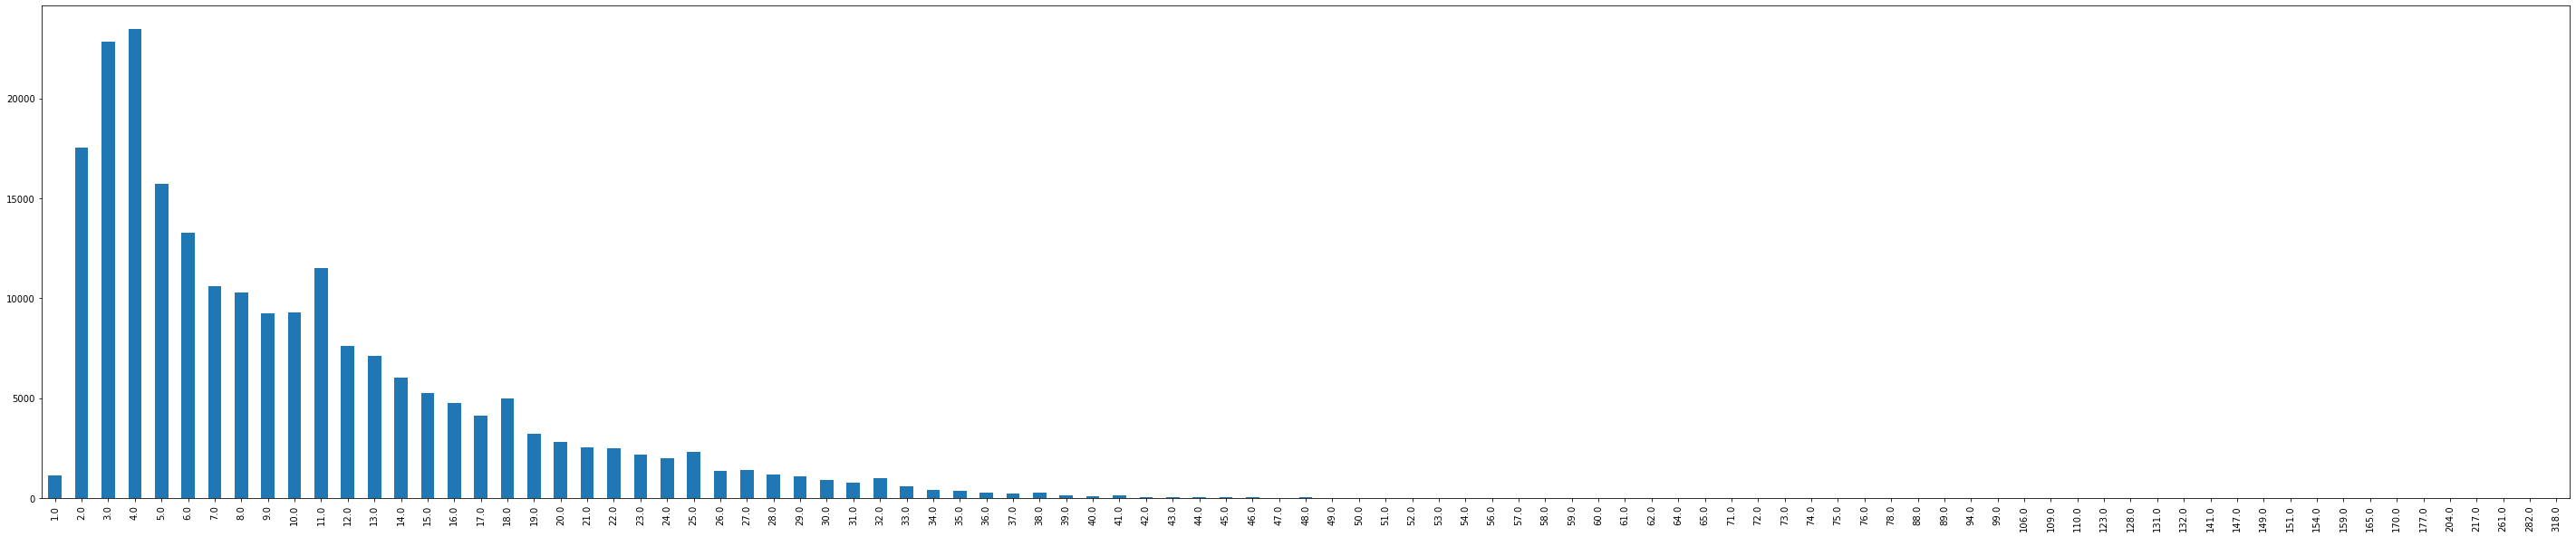

In [34]:
plt.figure(figsize=(50,10))
round((df_trees.diameter_cm/2.54)).value_counts().sort_index().plot.bar()
plt.show()

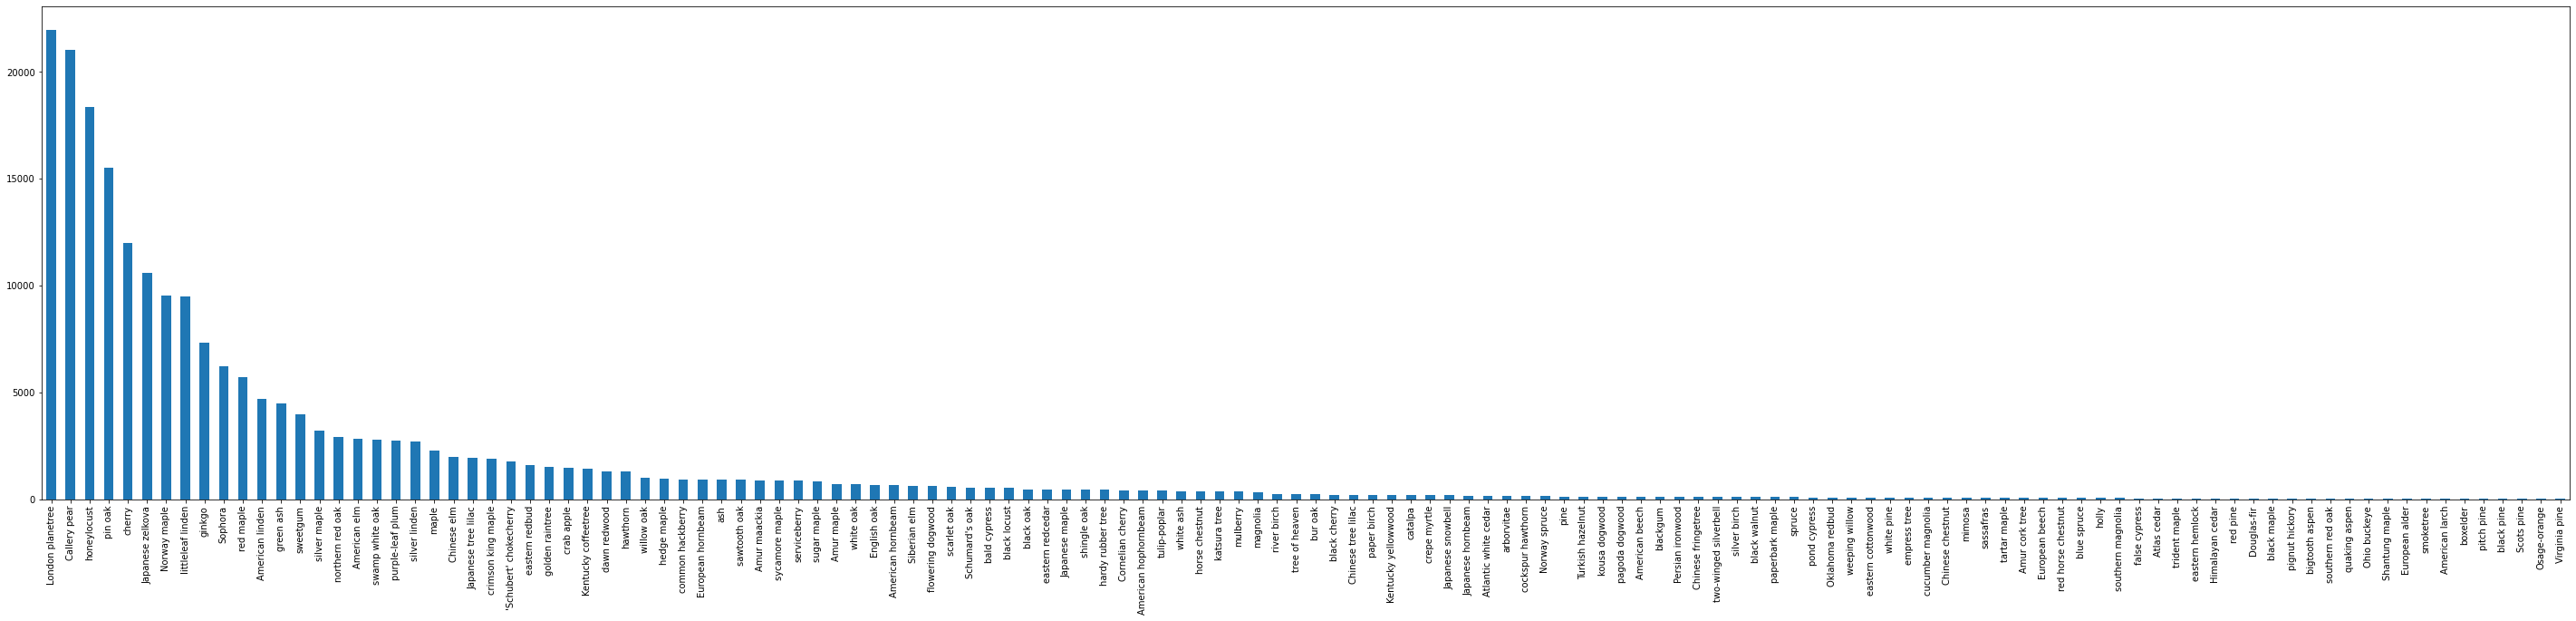

In [35]:
plt.figure(figsize=(50,10))
df_trees.spc_common.value_counts().plot.bar()
plt.show()

In [36]:
df_rats = pd.read_csv("data_rats/rats_data_clean.csv")
df_rats.head(2)

,latitude,longitude,Location Type
0,40.68123,-73.97288,3+ Family Apt. Building
1,40.68123,-73.97288,3+ Family Apt. Building


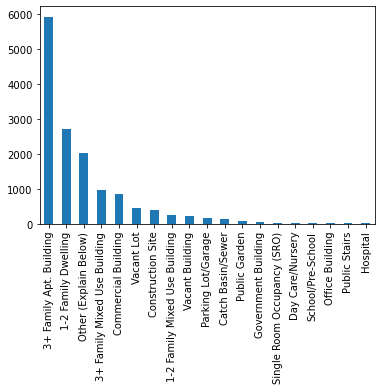

In [11]:
df_rats['Location Type'].value_counts().plot.bar()
plt.show()

In [10]:
df_places = pd.read_csv("data_places/places_data_clean.csv")
df_places.head(2)

,Tourist_Spot,Address,Zipcode,location,latitude,longitude
0,9/11 Memorial & Museum,rld Trade Center (museum: 180 Greenwich St.) M...,10007,"National September 11 Memorial & Museum, 180, ...",40.711304,-74.013283
1,Abyssinian Baptist Church,132 Odell Clark Place New York,10030,"Abyssinian Baptist Church, 132, Odell M Clarke...",40.816636,-73.941478


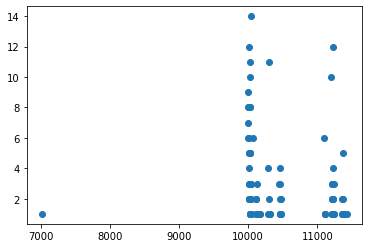

In [23]:
data = df_places['Zipcode'].value_counts().sort_index()
plt.scatter(x = data.index, y = data.values)
plt.show()

## Plots with Price and additioal features (Trees, Rats and Turistic Places)